In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings 
warnings.filterwarnings('ignore')

#import sklearn to prepare test and train data
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#for MinMax scalling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.feature_selection import RFE 
import statsmodels.api as sm 

#for calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing for r2 score calculation
from sklearn.metrics import r2_score


In [491]:
# Reading the data set
BoomBikes = pd.read_csv("day.csv")

# Looking at first 5 rows to get the glance of the data
BoomBikes.head()

# Check the shape of the dataset
BoomBikes.shape

(730, 16)

In [492]:
# Check for missing values
BoomBikes.info() 
#Given data does not have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [493]:
#Check for data ranges ex: by looking at min,max etc
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


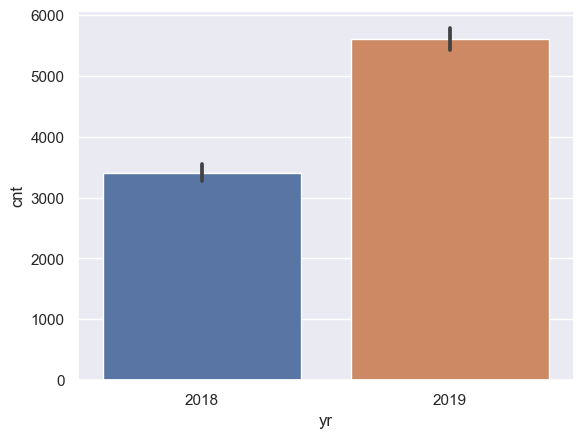

In [494]:
# Convert numeric values associated with the labels to categorical string values and visualize
# Converting 'yr' numerical values into categorical string values
BoomBikes.yr=BoomBikes.yr.map({1:2019,0:2018})
sns.barplot(x='yr',y='cnt',data=BoomBikes)
BoomBikes.head()

<hr> Above plot shows in year 2019 boom bikes usage count is more

<Axes: xlabel='season', ylabel='cnt'>

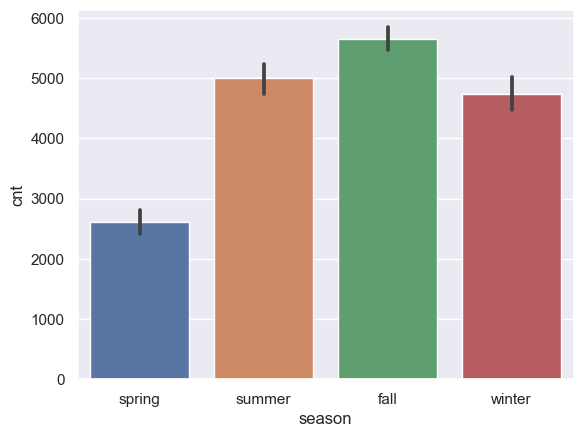

In [495]:
# Converting 'season' numerical values into categorical string values
BoomBikes[['season']]= BoomBikes[['season']].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
sns.barplot(x='season',y='cnt',data=BoomBikes)

<hr> Above bar plot clearly shows that bikes are used more in fall season


<Axes: xlabel='mnth', ylabel='cnt'>

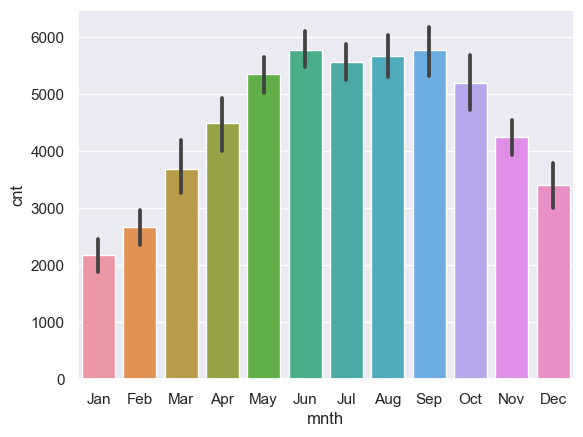

In [496]:
# Converting 'mnth' numerical values into categorical string values
BoomBikes[['mnth']]= BoomBikes[['mnth']].apply(lambda x: x.map({ 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))
sns.barplot(x='mnth',y='cnt',data=BoomBikes)

<hr> Above plot shows from month Jan to Jun increase in boom bikes usage and there are drops is usage in Jul, Aug & Sep. From september there is continues decrease in usage of the boom bikes.

<Axes: xlabel='weekday', ylabel='cnt'>

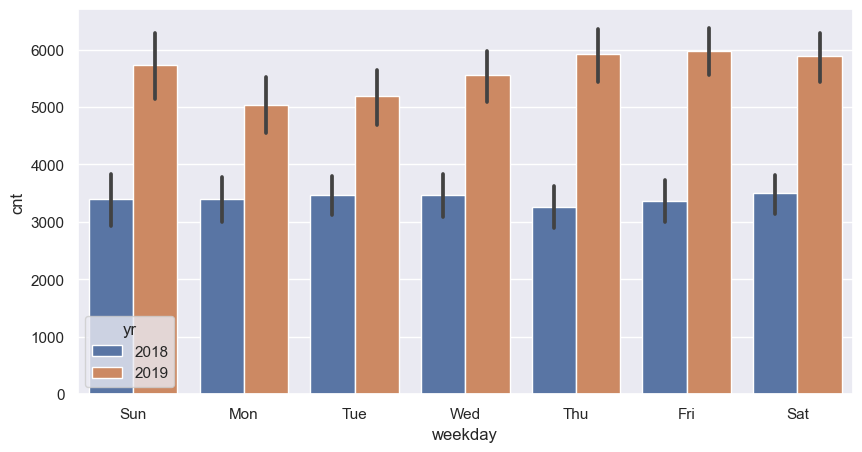

In [497]:
#Now lets compare in usage of boom bikes on each day
BoomBikes[['weekday']] = BoomBikes[['weekday']].apply(lambda x: x.map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}))
plt.figure(figsize=(10,5))
sns.barplot(x='weekday',y='cnt',hue='yr',data=BoomBikes)

<hr> Above plot shows increase in usage of boom bikes in 2019 vs 2018


<Axes: xlabel='workingday', ylabel='cnt'>

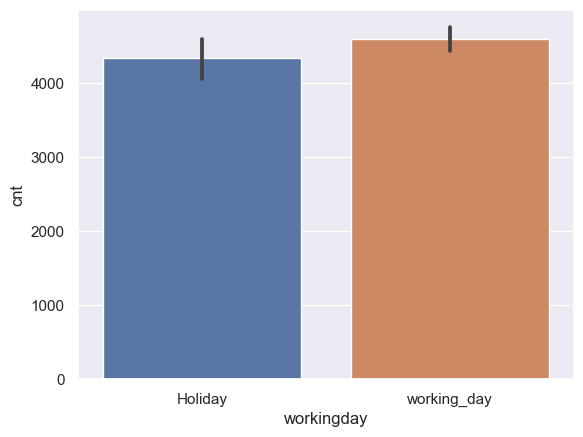

In [498]:
#Now lets compare against working day vs holiday
BoomBikes['workingday'] = BoomBikes['workingday'].map({1:'working_day',0:'Holiday'})
sns.barplot(x='workingday',y='cnt',data=BoomBikes)

<hr> Above plot shows usage of boom bikes is more on working days compare to Holidays

<Axes: xlabel='weathersit', ylabel='cnt'>

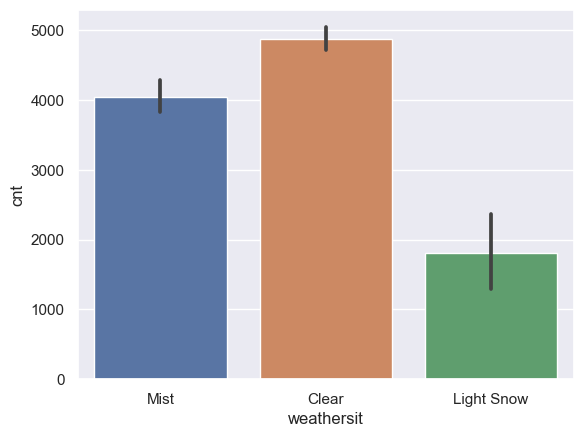

In [499]:
#Lets check the usage based on weather conditons
BoomBikes[['weathersit']] = BoomBikes[['weathersit']].apply(lambda x : x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}))
sns.barplot(x='weathersit',y='cnt',data=BoomBikes)

<hr> Above plot shows boom bikes usage is more on "Clear weathersit" weather and no usage on "Heavy Rain" season


In [500]:
#Re-encode the year again
BoomBikes.yr=BoomBikes.yr.map({2019:1,2018:0})

In [501]:
# Rename all categorical string variables to meaningfull names 
BoomBikes.rename(columns={'hum':'humidity','cnt':'count','yr':'year','mnth':'month'},inplace=True)
BoomBikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [502]:
#Since we have added another column to represent the year, we can drop dteday variable
BoomBikes.drop('dteday',axis=1,inplace=True)
BoomBikes.head()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,spring,0,Jan,0,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,spring,0,Jan,0,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,spring,0,Jan,0,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,spring,0,Jan,0,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,spring,0,Jan,0,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [503]:
#List all the categorical variables
categorical_variables = BoomBikes.select_dtypes(exclude=['float64','int64','datetime64'])
categorical_variables.head()

,season,month,weekday,workingday,weathersit
0,spring,Jan,Sun,Holiday,Mist
1,spring,Jan,Mon,Holiday,Mist
2,spring,Jan,Tue,working_day,Clear
3,spring,Jan,Wed,working_day,Clear
4,spring,Jan,Thu,working_day,Clear


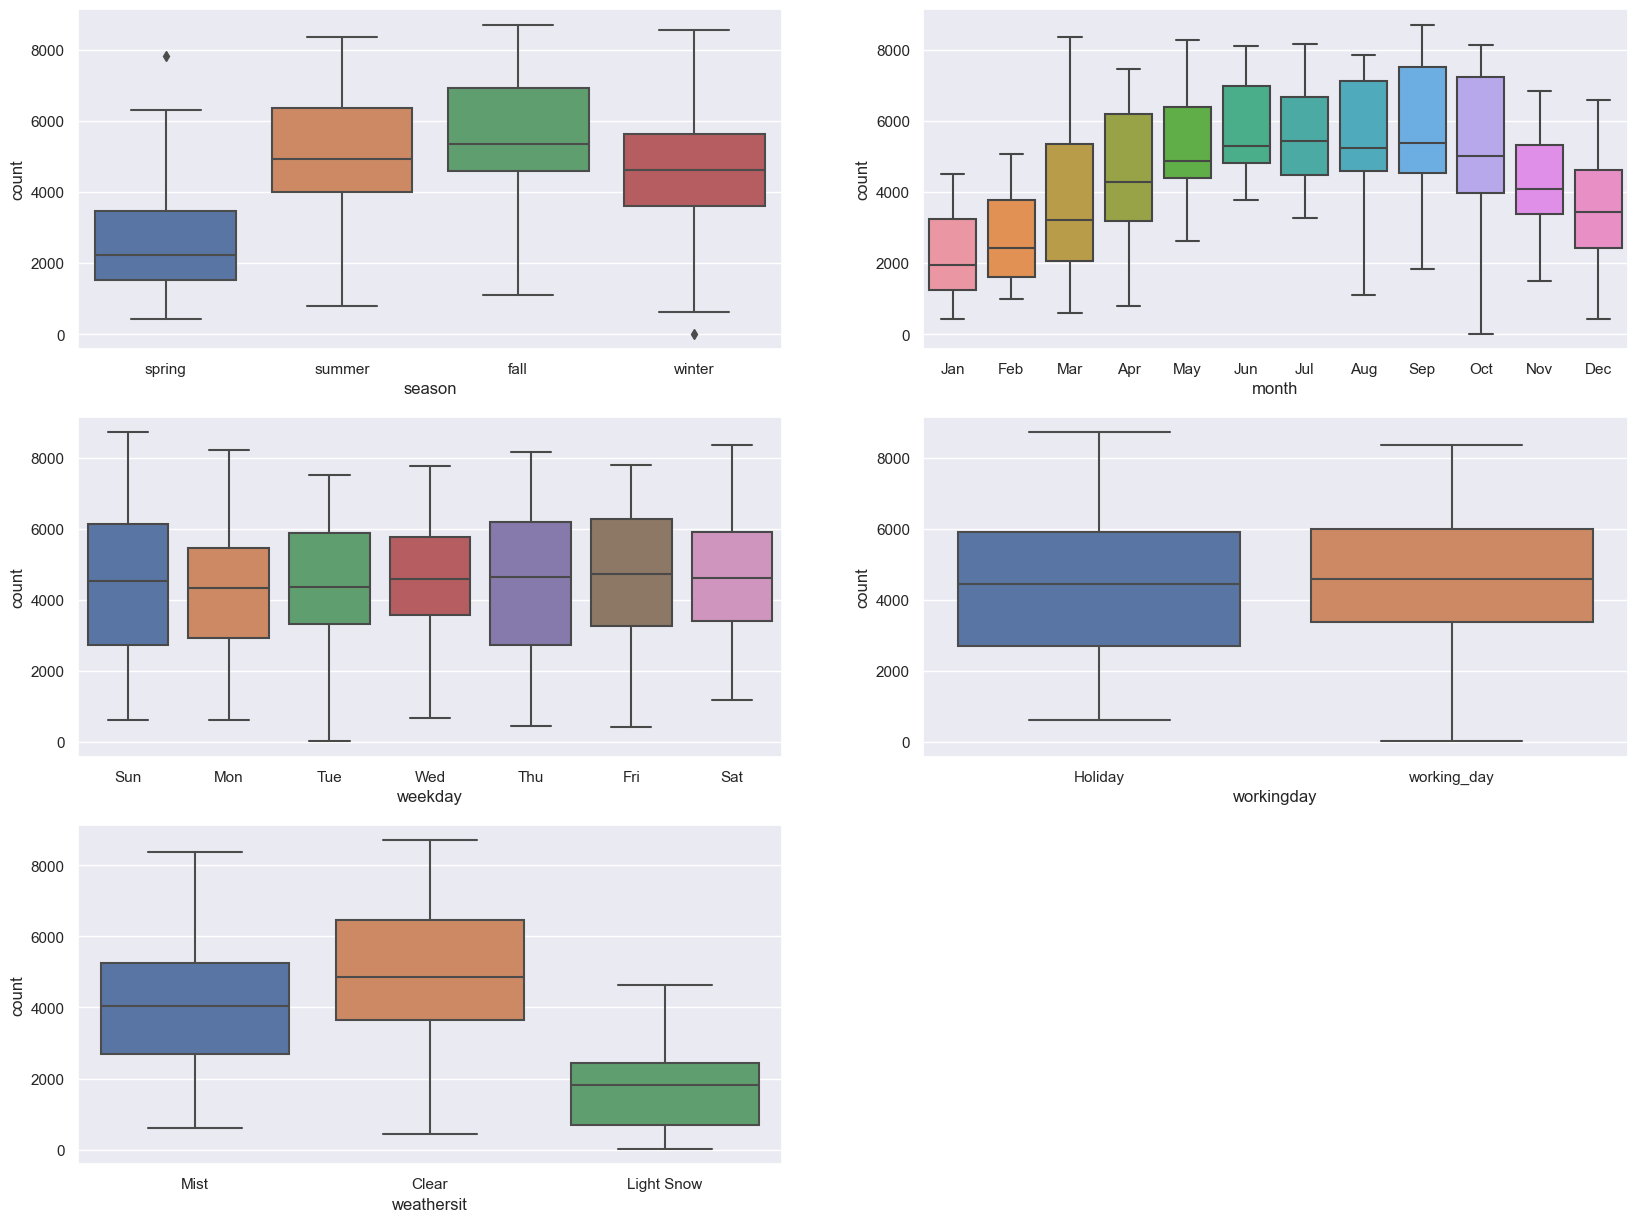

In [504]:
# Visualizing Categorical Variables

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.boxplot(x='season', y='count',data=BoomBikes)

plt.subplot(3,2,2)
sns.boxplot(x='month', y='count',data=BoomBikes)

plt.subplot(3,2,3)
sns.boxplot(x='weekday', y='count',data=BoomBikes)

plt.subplot(3,2,4)
sns.boxplot(x='workingday', y='count',data=BoomBikes)

plt.subplot(3,2,5)
sns.boxplot(x='weathersit', y='count',data=BoomBikes)


plt.show();

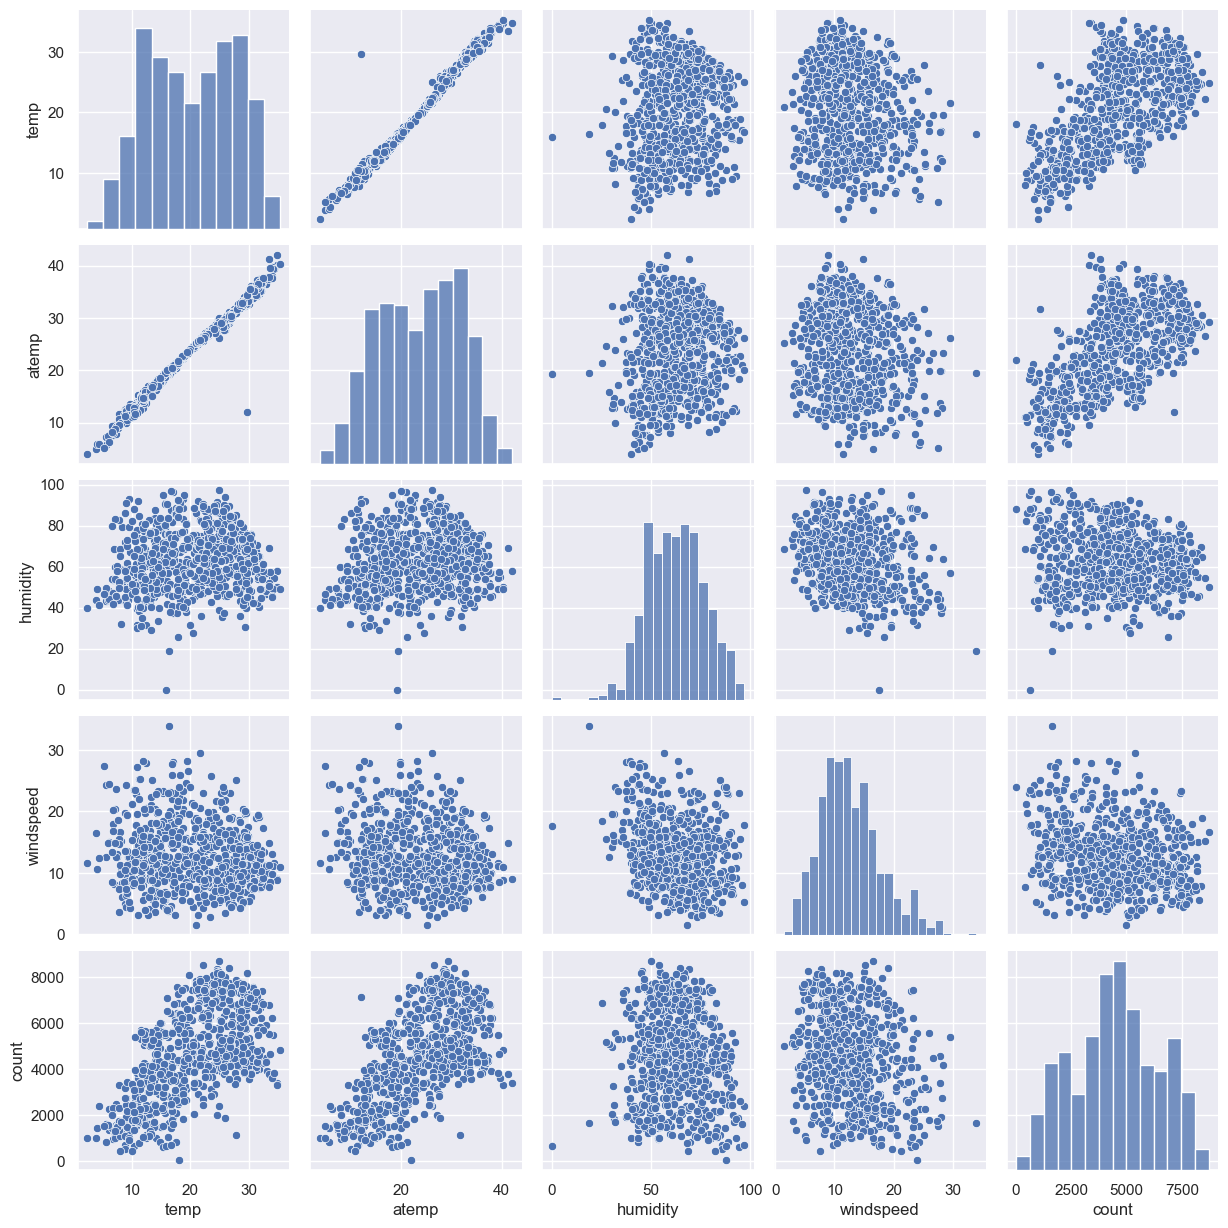

In [505]:
# Visualizing Numerical Variables

NumericalVariables = ['temp','atemp','humidity','windspeed','count']
sns.pairplot(BoomBikes[NumericalVariables])
plt.show()


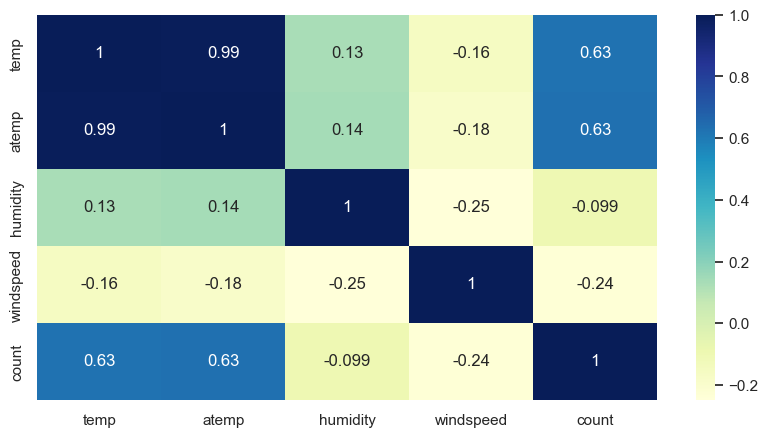

In [506]:
#Lets check the correlation between numerical variables and draw the heatmap
correlation = BoomBikes[NumericalVariables].corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot = True, cmap = "YlGnBu")
plt.show()

<hr> Above hearmap shows correlation between temp and atemp is same, hence one variale can be dropped to avoid the multicollinearity


In [507]:
# Before start building the model, need to have dummy variables for all categorical values and drop the categorical values
dummi_variables = pd.get_dummies(categorical_variables, drop_first=True)
dummi_variables.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [508]:
# Dropping atemp to avoid the multicolliearity
BoomBikes.drop('atemp',axis=1,inplace=True)
BoomBikes.head()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,casual,registered,count
0,1,spring,0,Jan,0,Sun,Holiday,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,spring,0,Jan,0,Mon,Holiday,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,spring,0,Jan,0,Tue,working_day,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,spring,0,Jan,0,Wed,working_day,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,spring,0,Jan,0,Thu,working_day,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [509]:
#Drop the catergorical_variables
BoomBikes = BoomBikes.drop(list(categorical_variables.columns), axis=1)
BoomBikes.head()

,instant,year,holiday,temp,humidity,windspeed,casual,registered,count
0,1,0,0,14.110847,80.5833,10.749882,331,654,985
1,2,0,0,14.902598,69.6087,16.652113,131,670,801
2,3,0,0,8.050924,43.7273,16.636703,120,1229,1349
3,4,0,0,8.200000,59.0435,10.739832,108,1454,1562
4,5,0,0,9.305237,43.6957,12.522300,82,1518,1600


In [510]:
#Append dummi_variables
BoomBikes = pd.concat([BoomBikes,dummi_variables], axis=1)

In [511]:
#Get train and test data
np.random.seed(0)
df_train, df_test = train_test_split(BoomBikes, train_size = 0.8, test_size = 0.2, random_state = 0)

In [512]:
scaler= StandardScaler()

In [513]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_test[num_vars]= scaler.transform(df_test[num_vars])

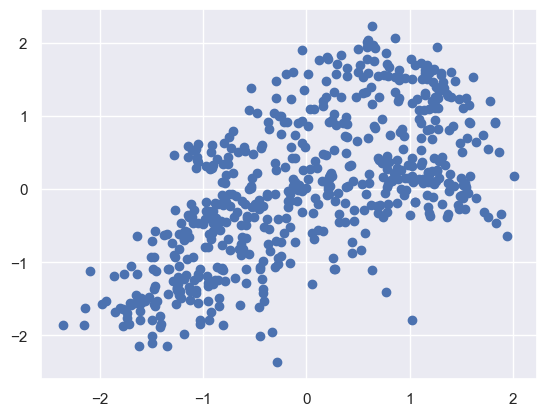

In [514]:
plt.scatter('temp','count',data=df_train)

In [515]:
y_train = df_train.pop('count')
X_train = df_train


In [516]:
y_test = df_test.pop('count')
X_test = df_test

In [517]:
# Adding Constant
X_train_sm = sm.add_constant(X_train)

In [518]:
# Create a first fitted model
lr = sm.OLS(y_train,X_train_sm).fit()


In [519]:
# Check the parameters obtained
lr.params

const                    -1.901956e+00
instant                   3.988563e-15
year                      2.062794e-13
holiday                  -4.754890e-01
temp                      9.686696e-15
humidity                  1.700029e-15
windspeed                -3.108624e-15
casual                    5.292009e-04
registered                5.292009e-04
season_spring             5.384582e-14
season_summer             2.297468e-14
season_winter             1.687539e-14
month_Aug                 4.993228e-14
month_Dec                 9.681145e-14
month_Feb                -7.904788e-14
month_Jan                -9.869883e-14
month_Jul                 6.036838e-14
month_Jun                 2.302325e-14
month_Mar                -5.312417e-14
month_May                -3.443773e-14
month_Nov                 1.251776e-13
month_Oct                 9.103829e-14
month_Sep                 1.937339e-14
weekday_Mon              -4.754890e-01
weekday_Sat               1.272593e-14
weekday_Sun              

In [520]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.418e+25
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:50:39   Log-Likelihood:                 15488.
No. Observations:                 584   AIC:                        -3.091e+04
Df Residuals:                     553   BIC:                        -3.078e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

<hr> Here we recieved r_squared = 0.836 and adjusted r_squared = 0.828 for our test data set.
these value are good but still we need to make perfect fit model , for this we will going to droping some variables and then check our R squar and R adjusted values to get more precised model.
For this either we can check droping one by one variable or we can use RFE method for automated Feature selection approach.

In [521]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [522]:
y_pred = regressor.predict(X_test)

In [523]:
df1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [524]:
df1.head()

,Actual,Predicted
196,0.757012,0.757012
187,0.052646,0.052646
14,-1.717002,-1.717002
31,-1.657732,-1.657732
390,-0.220951,-0.220951


Using Recursive feature elimination(RFE) for automated Feature Selection approach


In [525]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 31)
(146, 31)
(584,)
(146,)


In [531]:
# Running RFE with the output number of the variable equal to 15
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [532]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 17),
 ('year', True, 1),
 ('holiday', True, 1),
 ('temp', False, 3),
 ('humidity', False, 2),
 ('windspeed', False, 7),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('month_Aug', True, 1),
 ('month_Dec', False, 14),
 ('month_Feb', False, 16),
 ('month_Jan', False, 11),
 ('month_Jul', False, 15),
 ('month_Jun', True, 1),
 ('month_Mar', False, 9),
 ('month_May', False, 4),
 ('month_Nov', True, 1),
 ('month_Oct', True, 1),
 ('month_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 5),
 ('weekday_Tue', False, 13),
 ('weekday_Wed', False, 8),
 ('workingday_working_day', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', False, 6)]

In [533]:
(rfe.support_==True).sum()

15

In [534]:
(rfe.support_==False).sum()

16

In [535]:
rfe_supp= X_train.columns[rfe.support_]
rfe_supp

Index(['year', 'holiday', 'casual', 'registered', 'season_spring',
       'season_winter', 'month_Aug', 'month_Jun', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sun', 'workingday_working_day',
       'weathersit_Light Snow'],
      dtype='object')

In [536]:
X_train_rfe = X_train[rfe_supp]

In [537]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [538]:
#First attempt
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.519e+27
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:08   Log-Likelihood:                 16365.
No. Observations:                 584   AIC:                        -3.270e+04
Df Residuals:                     569   BIC:                        -3.263e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

Second attempt
In the above Regression result we can see that workingday_working_day had p value more than 0.05 . So first we will try
dropping and then see the result.
workingday_working_day is insignificant.


In [539]:
X_train1= X_train_rfe.drop(["workingday_working_day"], axis = 1)

In [540]:
X_train_new = build_model(X_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.942e+23
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:09   Log-Likelihood:                 13954.
No. Observations:                 584   AIC:                        -2.788e+04
Df Residuals:                     569   BIC:                        -2.781e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.37

In [541]:
X_train1= sm.add_constant(X_train1)

In [542]:
X_train_new= X_train1.drop('const',axis=1)

In [543]:
#Final VIF
#Checking VIF for the Model
checkVIF(X_train_new)

,Features,VIF
3,registered,10.61
2,casual,8.73
5,season_winter,4.76
0,year,3.30
9,month_Oct,2.42
12,weekday_Sun,2.36
8,month_Nov,2.25
11,weekday_Mon,2.12
4,season_spring,1.66
6,month_Aug,1.34


Step: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [544]:
lm1 = sm.OLS(y_train,X_train1).fit() 

In [545]:
y_train_pred = lm1.predict(X_train1)

Text(0.5, 0, 'Errors')

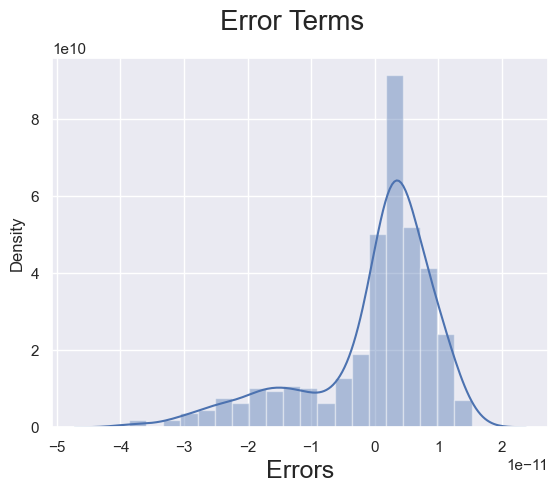

In [546]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Making Predictions Using the Final Model


In [547]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [548]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

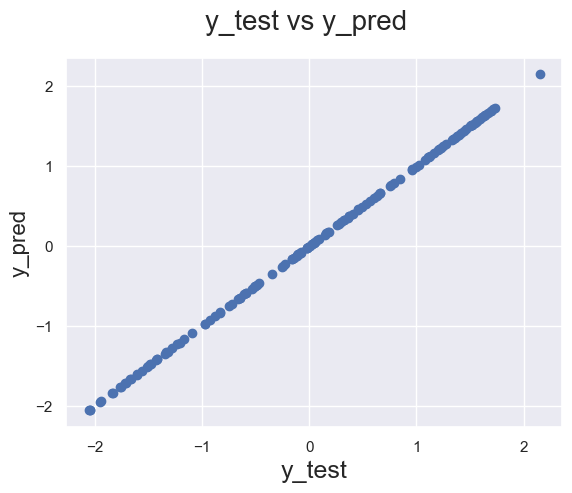

In [549]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [550]:
r2_score(y_test, y_test_pred)

1.0

Conclusion:
The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

spring : -0.4662
month_Sep : 0.2079
temp : 0.4196
Light Snow : -1.2970
weekday_Mon : 0.1586